<h3>
<font color='red'>
Practicing. Real stuff below
</font>
</h3>

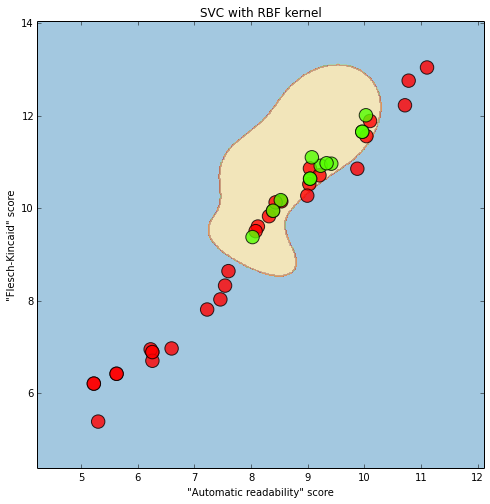

NameError: name 'Y' is not defined

In [40]:
%matplotlib inline

# -------------- FULL SET ---------------

#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([training.fk_score,training.ar_score]).T
y = np.array(training.score)

h = .02  # step size in the mesh

C = 16  # SVM regularization param'auto'
clf = svm.SVC(kernel='rbf', gamma=1, C=C, class_weight='auto').fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
title = 'SVC with RBF kernel'

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].


Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.prism, alpha = 0.8, s=180)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('"Automatic readability" score')
plt.ylabel('"Flesch-Kincaid" score')
plt.title(title)
fig.set_size_inches(8,8)

plt.show()

from sklearn import cross_validation
scores = cross_validation.cross_val_score(clf, X, Y, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

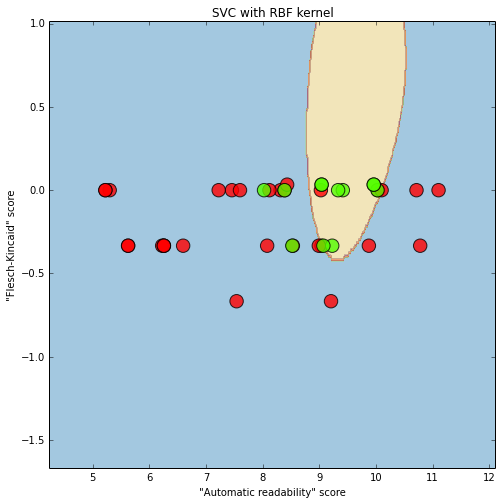

F: 0.56 (+/- 0.26)
Precision: 0.73 (+/- 0.09)
Recall: 0.63 (+/- 0.57)


In [42]:
# -------------- USE THIS ONE ---------------

#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features. We could
#                       # avoid this ugly slicing by using a two-dim dataset
# y = iris.target

X = np.array([training.fk_score,training['winning_w']]).T
y = np.array(training.score)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 16  # SVM regularization param'auto'
clf = svm.SVC(kernel='rbf', gamma=0.6, C=C, class_weight='auto').fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
title = 'SVC with RBF kernel'

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.prism, alpha = 0.8, s=180)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('"Automatic readability" score')
plt.ylabel('"Flesch-Kincaid" score')
plt.title(title)
fig.set_size_inches(8,8)

plt.show()

from sklearn import cross_validation
scoresF = cross_validation.cross_val_score(clf, X, y, cv=3,scoring='f1_weighted')
scoresP = cross_validation.cross_val_score(clf, X, y, cv=3,scoring='precision')
scoresR = cross_validation.cross_val_score(clf, X, y, cv=3,scoring='recall')


print("F: %0.2f (+/- %0.2f)" % (scoresF.mean(), scoresF.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scoresP.mean(), scoresP.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (scoresR.mean(), scoresR.std() * 2))

In [39]:
# -------------- FULL SET , cross-validation ---------------

#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from __future__ import print_function

X = np.array([training.fk_score,training.ar_score,training['winning_w']]).T
#X = np.array([training.fk_score,training['winning_w']]).T
y = np.array(training.score)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Clist = range(1,40)
gammalist = []
for i in range(1,20): gammalist.append(i/10.)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': gammalist,
                     'C': Clist, 'class_weight': ['auto']}]

scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



# Tuning hyper-parameters for f1

Best parameters set found on development set:

SVC(C=16, cache_size=200, class_weight='auto', coef0=0.0, degree=3, gamma=1.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Grid scores on development set:

0.502 (+/-0.208) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1, 'class_weight': 'auto'}
0.578 (+/-0.173) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.2, 'class_weight': 'auto'}
0.566 (+/-0.177) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.3, 'class_weight': 'auto'}
0.540 (+/-0.169) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.4, 'class_weight': 'auto'}
0.513 (+/-0.150) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.5, 'class_weight': 'auto'}
0.540 (+/-0.169) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.6, 'class_weight': 'auto'}
0.540 (+/-0.169) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.7, 'class_weight': 'auto'}
0.540 (+/-0.169) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.8, 'class_weight': 'auto'}
0.540 (+/-0.169

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
gammalist = []
for i in range(1,20): gammalist.append(i/10.)
gammalist

[0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9]

In [ ]:
#  try different pickles
from sklearn.externals import joblib
joblib.dump(clf, './classifyer/classifyer.pkl') 
lg2 = joblib.load('./classifyer/classifyer.pkl')

Z = lg2.predict([12,12])
Z[0]

In [ ]:
import pickle
with open('./classifyer/classifyer.pkl','wb') as f:
    pickle.dump(clf,f)

clf2 = pickle.load(open('./classifyer/classifyer.pkl'))


Z = clf2.predict([12,12])
Z[0]

<h3>
<font color='red'>
NEW PIPELINE: CREATE MATRIX
</font>
</h3>

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# TFIDF ---  http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/

import MySQLdb as mdb
import sys
import nltk
import pandas as pd
from textstat.textstat import textstat
import copy
import numpy as np
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
import math 
import re
import nltk.stem.porter as porter



def read_in_mysql():
    ''' reads metadata and reviews databases into dataframes.
        Usage:  df_m, df_r = read_in_mysql()'''
    
    con = mdb.connect('localhost', 'insightUser', 'insight15', 'amazon_filtered_compact');
    cur = con.cursor()
    
    cur.execute("SELECT * FROM reviews")
    data = cur.fetchall()
    
    df_reviews = pd.DataFrame( [[ij for ij in i] for i in data] )
    df_reviews.rename(columns={0: 'Number',
                               1: 'asin', 
                               2: 'helpful-1',
                               3: 'helpful-2',
                               4: 'overall_score',
                               5: 'review_text',
                               6: 'reviewer_id',
                               7: 'review_summary'}, 
                      inplace=True);
    df_reviews.drop('Number',axis=1, inplace = True)
    
    cur.execute("SELECT * FROM metadata")
    data = cur.fetchall()

    df_metadata = pd.DataFrame( [[ij for ij in i] for i in data] )
    df_metadata.rename(columns={0: 'Number',
                                1: 'asin',
                                2: 'title',
                                3: 'imgUrl',
                                4: 'relevant_asins',
                                5: 'sales_rank'}, 
                       inplace=True);

    df_metadata.drop('Number',axis=1, inplace = True)

    con.close()
    
    return df_metadata, df_reviews

dfm, dfr = read_in_mysql()


def build_vectors(counter1, counter2):
    all_items = set(counter1.keys()).union(set(counter2.keys()))
    vector1 = [counter1[k] for k in all_items]
    vector2 = [counter2[k] for k in all_items]
    return vector1, vector2

def normalized_product(v1, v2):
    dot_product = sum(n1 * n2 for n1, n2 in zip(v1, v2) )
    magnitude1 = math.sqrt(sum(n ** 2 for n in v1))
    magnitude2 = math.sqrt(sum(n ** 2 for n in v2))
    return dot_product / (magnitude1 * magnitude2)

def get_filtered_counter(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    #no_punctuation = lowers.translate(dict.fromkeys(string.punctuation)) # -- TODOlowers.translate(string.punctuation)
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    no_punctuation = regex.sub('', lowers)
    tokens = nltk.word_tokenize(no_punctuation)
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    return Counter(tokens)

def get_filtered_stemmed_counter(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    filtered = get_filtered_counter(text)
    stemmer = porter.PorterStemmer()
    stemmed = []
    for item in filtered:
        stemmed.append(stemmer.stem(item))
    return Counter(stemmed)

def filtered_cosine_similarity(text1,text2):
    c1 = get_filtered_stemmed_counter(text1)
    c2 = get_filtered_stemmed_counter(text2)
    
    v1,v2 = build_vectors(c1, c2)
    return normalized_product(v1, v2)

def get_title(asin,dfm):
    return dfm[dfm.asin==asin].title.values[0]


In [2]:
# ---- set 1 - 3 classes, set 2 - 2 classes -----------------
training = pd.DataFrame.from_csv('training_set_2.csv')
training = training.reset_index()
high_score_treshold = 4.

training['nrevs'] = 0.
training['ar_score'] = 0.
training['fk_score'] = 0.
training['nrevs_positive'] = 0
training['avg_rating'] = 0
training['title'] = ''


# --------------- fill titles -------------------
for asin in training.asin:
    title = dfm.title[dfm.asin==asin].values
    indx = training[training.asin == asin].index
    training.loc[indx,'title'] = title
    
    

# ----------FILL  THE TRAINING WEIGHTS --------
for index, row in training.iterrows():
    asin = row.asin
    df = dfr[dfr.asin==asin]
    
    revs = df[df.overall_score >= high_score_treshold].review_text
    revs_all = df.review_text
    nrevs = df.shape[0]
    nrevs_positive = revs.shape[0]

    avg_rating = 0
    if nrevs > 0: avg_rating = sum(df['overall_score'].values)/nrevs
    
    score01 = 0.
    score02 = 0.
    scores1_count = 0
    scores2_count = 0
    debug_failed_count = 0
    
    for rev in revs: 
        try:
            #a number that approximates the grade level needed to comprehend the text.
            score1 = textstat.automated_readability_index(rev)
            score01 += score1
            scores1_count +=1
        except: debug_failed_count +=1
            
        try: 
            #flesch_reading_ease  https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
            score2 = textstat.flesch_kincaid_grade(rev)
            score02 += score2
            scores2_count +=1
        except: debug_failed_count +=1
            
    if scores1_count > 0:
        score01 /= scores1_count
        
    if scores2_count > 0:
        score02 /= scores2_count
        
    indx = training[training.asin == asin].index
    training.loc[indx,'ar_score'] = score01
    training.loc[indx,'fk_score'] = score02
    training.loc[indx,'nrevs'] = int(nrevs)
    training.loc[indx,'nrevs_positive'] = nrevs_positive 
    training.loc[indx,'avg_rating'] = round(avg_rating,1) 
    

training=training.sort('score')

training


,asin,score,nrevs,ar_score,fk_score,nrevs_positive,avg_rating,title
20,0199225869,1,35,10.150000,8.533333,30,4.3,Nothing: A Very Short Introduction
32,0201380277,1,61,10.864103,9.038462,39,3.8,An Introduction to Thermal Physics
28,0201021153,1,78,10.523611,9.027778,72,4.7,The Feynman Lectures on Physics (3 Volume Set)...
27,0199918112,1,38,11.561290,10.035484,31,4.3,Cybersecurity and Cyberwar: What Everyone Need...
26,0199919755,1,149,13.047000,11.105000,100,3.9,Mind and Cosmos: Why the Materialist Neo-Darwi...
25,0199603499,1,37,11.888889,10.100000,27,4.2,Higgs: The Invention and Discovery of the God ...
24,0199572194,1,32,10.713333,9.206667,30,4.6,The Laws of Thermodynamics: A Very Short Intro...
23,0199291152,1,291,10.273577,8.991463,246,4.4,The Selfish Gene: 30th Anniversary Edition--wi...
22,0199232369,1,26,12.761905,10.780952,21,4.2,Four Laws That Drive the Universe
21,0199236224,1,17,10.856250,9.875000,16,4.5,Relativity: A Very Short Introduction


In [6]:
def stem_words(words):
    stemmer = porter.PorterStemmer()
    stemmed = []
    for item in words:
        stemmed.append(stemmer.stem(item))
    return stemmed

def get_stemmed_set(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    filtered = get_filtered_counter(text)
    stemmer = porter.PorterStemmer()
    stemmed = []
    for item in filtered:
        stemmed.append(stemmer.stem(item))
    return set(stemmed)

def get_word_dict(text,keyset):
    keywd={}
    for keyword in keyset:
        keywd[keyword] = 0
    
    stemmed_text = get_stemmed_set(text)
    for word in stemmed_text:
        if word in keywd:
            keywd[word]+=1.
    return keywd

def count_keywords(indict):
    return sum(indict[key] for key in indict)

adv_words = ['modern',
             'principles',
             'lagrangian',
             'hamiltonian',
             'fundamentals'
            ]

intro_words = ['introduction',
               'laws',
               'elementary',
               'engineering',
               'basic'
              ]

adv_w = stem_words(adv_words)
intro_w = stem_words(intro_words)

training['adv_w'] = 0
training['intro_w'] = 0
training['winning_w'] = 0

for asin in training.asin:
    title = training[training.asin==asin].title.values[0]
    wd_a = get_word_dict(title,adv_w)
    wd_i = get_word_dict(title,intro_w)
    wa_count = count_keywords(wd_a)
    wi_count = count_keywords(wd_i)

    indx = training[training.asin==asin].index

    training.loc[indx,'adv_w'] = wa_count
    training.loc[indx,'intro_w'] = wi_count
    
    scale = 10
    training.loc[indx,'winning_w'] = (wa_count - scale * wi_count)/30

In [7]:
training

,asin,score,nrevs,ar_score,fk_score,nrevs_positive,avg_rating,title,inferred_class,imgUrl,relevant_asins,adv_w,intro_w,winning_w
20,0199225869,1,35,10.150000,8.533333,30,4.3,Nothing: A Very Short Introduction,0,http://ecx.images-amazon.com/images/I/41S9PC2O...,0199594414 0192804340 0199236224 0192802526 01...,0,1,-0.333333
32,0201380277,1,61,10.864103,9.038462,39,3.8,An Introduction to Thermal Physics,0,http://ecx.images-amazon.com/images/I/511A4P0Y...,0131118927 0321856562 189138922X 0471198269 14...,0,1,-0.333333
28,0201021153,1,78,10.523611,9.027778,72,4.7,The Feynman Lectures on Physics (3 Volume Set)...,0,http://ecx.images-amazon.com/images/I/71XTRDP9...,0465023827 0465024939 0465027970 0201021161 08...,0,0,0.000000
27,0199918112,1,38,11.561290,10.035484,31,4.3,Cybersecurity and Cyberwar: What Everyone Need...,0,http://ecx.images-amazon.com/images/I/51ouWTue...,0061962244 0771025351 0143116843 0124166725 09...,0,0,0.000000
26,0199919755,1,149,13.047000,11.105000,100,3.9,Mind and Cosmos: Why the Materialist Neo-Darwi...,0,http://ecx.images-amazon.com/images/I/41dvfCkc...,0674726820 0061335304 0199812098 006223059X 01...,0,0,0.000000
25,0199603499,1,37,11.888889,10.100000,27,4.2,Higgs: The Invention and Discovery of the God ...,0,http://ecx.images-amazon.com/images/I/51pQHicg...,0470636246 0525953590 0374114129 0465021441 01...,0,0,0.000000
24,0199572194,1,32,10.713333,9.206667,30,4.6,The Laws of Thermodynamics: A Very Short Intro...,0,http://ecx.images-amazon.com/images/I/81oMBYNc...,0199236224 0192804340 0192802526 0199601208 01...,0,2,-0.666667
23,0199291152,1,291,10.273577,8.991463,246,4.4,The Selfish Gene: 30th Anniversary Edition--wi...,0,http://ecx.images-amazon.com/images/I/41SHx3tP...,0618918248 1416594795 0393315703 0192880519 00...,0,1,-0.333333
22,0199232369,1,26,12.761905,10.780952,21,4.2,Four Laws That Drive the Universe,0,http://ecx.images-amazon.com/images/I/41oz5Dzq...,0199683980 0199695121 0199572194 1891389068 18...,0,1,-0.333333
21,0199236224,1,17,10.856250,9.875000,16,4.5,Relativity: A Very Short Introduction,0,http://ecx.images-amazon.com/images/I/51tufXHi...,0192802526 0192804340 0199572194 0199601208 01...,0,1,-0.333333


In [8]:
training['inferred_class'] = 0
training['imgUrl'] = ''
training['relevant_asins'] = ''

# ----------FILL  THE TRAINING WEIGHTS --------
for indx, row in training.iterrows():
    asin = row.asin
    dfmrow = dfm[dfm.asin==asin]
    imgUrl = dfmrow['imgUrl']
    relevant_asins = dfmrow['relevant_asins']
    
    indx = training[training.asin == asin].index
    
    training.loc[indx,'imgUrl'] = imgUrl.values[0]
    training.loc[indx,'relevant_asins'] = relevant_asins.values[0]


In [9]:
# ---------------- CLASSIFYER ----------------------
from sklearn import svm
X = np.array([training.fk_score,training['winning_w']]).T
y = np.array(training.score)

C = 15  # SVM regularization param'auto'
clf = svm.SVC(kernel='rbf', gamma=0.6, C=C, class_weight='auto').fit(X, y)

In [11]:
# ------------ set the scores ----------------
# ----------FILL  THE TRAINING WEIGHTS --------
for index, row in training.iterrows():
    X = [row.fk_score,row['winning_w']]
    Z = clf.predict(X)
    training.loc[index,'inferred_class'] = Z

training

,asin,score,nrevs,ar_score,fk_score,nrevs_positive,avg_rating,title,inferred_class,imgUrl,relevant_asins,adv_w,intro_w,winning_w
20,0199225869,1,35,10.150000,8.533333,30,4.3,Nothing: A Very Short Introduction,2,http://ecx.images-amazon.com/images/I/41S9PC2O...,0199594414 0192804340 0199236224 0192802526 01...,0,1,-0.333333
32,0201380277,1,61,10.864103,9.038462,39,3.8,An Introduction to Thermal Physics,2,http://ecx.images-amazon.com/images/I/511A4P0Y...,0131118927 0321856562 189138922X 0471198269 14...,0,1,-0.333333
28,0201021153,1,78,10.523611,9.027778,72,4.7,The Feynman Lectures on Physics (3 Volume Set)...,2,http://ecx.images-amazon.com/images/I/71XTRDP9...,0465023827 0465024939 0465027970 0201021161 08...,0,0,0.000000
27,0199918112,1,38,11.561290,10.035484,31,4.3,Cybersecurity and Cyberwar: What Everyone Need...,2,http://ecx.images-amazon.com/images/I/51ouWTue...,0061962244 0771025351 0143116843 0124166725 09...,0,0,0.000000
26,0199919755,1,149,13.047000,11.105000,100,3.9,Mind and Cosmos: Why the Materialist Neo-Darwi...,1,http://ecx.images-amazon.com/images/I/41dvfCkc...,0674726820 0061335304 0199812098 006223059X 01...,0,0,0.000000
25,0199603499,1,37,11.888889,10.100000,27,4.2,Higgs: The Invention and Discovery of the God ...,2,http://ecx.images-amazon.com/images/I/51pQHicg...,0470636246 0525953590 0374114129 0465021441 01...,0,0,0.000000
24,0199572194,1,32,10.713333,9.206667,30,4.6,The Laws of Thermodynamics: A Very Short Intro...,1,http://ecx.images-amazon.com/images/I/81oMBYNc...,0199236224 0192804340 0192802526 0199601208 01...,0,2,-0.666667
23,0199291152,1,291,10.273577,8.991463,246,4.4,The Selfish Gene: 30th Anniversary Edition--wi...,2,http://ecx.images-amazon.com/images/I/41SHx3tP...,0618918248 1416594795 0393315703 0192880519 00...,0,1,-0.333333
22,0199232369,1,26,12.761905,10.780952,21,4.2,Four Laws That Drive the Universe,1,http://ecx.images-amazon.com/images/I/41oz5Dzq...,0199683980 0199695121 0199572194 1891389068 18...,0,1,-0.333333
21,0199236224,1,17,10.856250,9.875000,16,4.5,Relativity: A Very Short Introduction,2,http://ecx.images-amazon.com/images/I/51tufXHi...,0192802526 0192804340 0199572194 0199601208 01...,0,1,-0.333333


In [37]:
tuned_parameters

[{'C': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39],
  'class_weight': ['auto'],
  'gamma': [0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   0.6,
   0.7,
   0.8,
   0.9,
   1.0,
   1.1,
   1.2,
   1.3,
   1.4,
   1.5,
   1.6,
   1.7,
   1.8,
   1.9],
  'kernel': ['rbf']}]

In [12]:
# write into database  3rd_week_tries.ipynb

# -- moderately deprecated

con = mdb.connect('localhost', 'insightUser', 'insight15', 'amazon_filtered_compact');
training.to_sql(con=con, name='trained',if_exists='replace', flavor='mysql')

con.close()

/usr/local/lib/python2.7/dist-packages/pandas/io/sql.py:599: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy engines.
  warnings.warn(_MYSQL_WARNING, FutureWarning)
/usr/lib/python2.7/dist-packages/MySQLdb/cursors.py:206: Warning: Data truncated for column 'relevant_asins' at row 1
  r = r + self.execute(query, a)
/usr/lib/python2.7/dist-packages/MySQLdb/cursors.py:206: Warning: Data truncated for column 'title' at row 1
  r = r + self.execute(query, a)


<h3>
<font color='red'>
PIPELINE FOR READING DATAFRAME FROM THE DATABASE
</font>
</h3>

In [8]:
import MySQLdb as mdb
# import sys
import pandas as pd
from textstat.textstat import textstat
import copy
import numpy as np
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
import math 
import re
import nltk.stem.porter as porter

def build_vectors(counter1, counter2):
    all_items = set(counter1.keys()).union(set(counter2.keys()))
    vector1 = [counter1[k] for k in all_items]
    vector2 = [counter2[k] for k in all_items]
    return vector1, vector2

def normalized_product(v1, v2):
    dot_product = sum(n1 * n2 for n1, n2 in zip(v1, v2) )
    magnitude1 = math.sqrt(sum(n ** 2 for n in v1))
    magnitude2 = math.sqrt(sum(n ** 2 for n in v2))
    return dot_product / (magnitude1 * magnitude2)

def get_filtered_counter(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    #no_punctuation = lowers.translate(dict.fromkeys(string.punctuation)) # -- TODOlowers.translate(string.punctuation)
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    no_punctuation = regex.sub('', lowers)
    tokens = nltk.word_tokenize(no_punctuation)
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    return Counter(tokens)

def get_filtered_stemmed_counter(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    filtered = get_filtered_counter(text)
    stemmer = porter.PorterStemmer()
    stemmed = []
    for item in filtered:
        stemmed.append(stemmer.stem(item))
    return Counter(stemmed)

def filtered_cosine_similarity(text1,text2):
    c1 = get_filtered_stemmed_counter(text1)
    c2 = get_filtered_stemmed_counter(text2)
    
    v1,v2 = build_vectors(c1, c2)
    return normalized_product(v1, v2)

def find_related_asins_depth1(asin, dfm):
    row = dfm[dfm.asin == asin]
    
    if row.empty: return set([])
    for asins_str in row.relevant_asins: pass # TODO: find better way to access an object
    asins = asins_str.split()
    
    asins_set = set([])
    
    for asin1 in asins: 
        row1 = dfm[dfm.asin == asin1]
        if not row1.empty: asins_set.add(asin1)
    
    return asins_set

def find_related_asins(asin, dfm, depth):
    ''' asins are related by amazon'z connections;
        depth is how many layers in the network we go '''
    try:
        if depth == 0: return set([asin])
        
        asins = find_related_asins_depth1(asin, dfm)
        if depth == 1: return asins
        asins_out = copy.deepcopy(asins)
        for asin1 in asins:
            asins_out.update(find_related_asins(asin1,dfm,depth-1))

        return asins_out
    except Exception as e:
        print "failed in find_related_asins  ", e
        return {}

def titles_match(title1,title2):
    treshold = 0.8
    return filtered_cosine_similarity(title1,title2) > treshold

def get_coarsegrained_difficulty_new(score):
    if score == 1:
        result = 'easy to moderate'
    elif score == 2:
        result = 'advanced'
    else:
        result = 'Could not find out'
    return result

# sort dataframes titles by similarity with the source
def include_title_similarity(df,title0):
    df['similarity'] = 0
    for title in df.title.values:
        indx = df[df.title == title].index
        df.loc[indx,'similarity'] = filtered_cosine_similarity(title,title0)
    return df.sort('similarity', inplace = True, ascending = 0)

def empty_dict():
    d = {'adv_w': [0],
  'ar_score': [0],
  'asin': [''],
  'avg_rating': [0.],
  'difficulty': [''],
  'fk_score': [0.],
  'imgUrl': ['../static/background_output.jpg'],
  'index': [0],
  'inferred_class': [2],
  'intro_w': [0.],
  'nrevs': [0.],
  'nrevs_positive': [0],
  'relevant_asins': [''],
  'score': [0],
  'similarity': [0],
  'title': ['d','fd'],
  'winning_w': [0]}
    return d

# def new_pipeline(intitle,max_depth):

def pipeline(in_title,in_depth):

    con1 = mdb.connect('localhost', 'insightUser', 'insight15', 'amazon_filtered_compact');
    dfres = pd.read_sql('select * from trained;', con=con1) 
    con1.close()

    # ---- asins of books matching the query --------
    asin0_set = set([])
    for index, row in dfres.iterrows():
        title = row.title
        if (titles_match(title,in_title)):
            asin0_set.add(row.asin)
            
    if not asin0_set:        
        return False, empty_dict()


    # ---------- all related asins ---------
    asinall_set = copy.deepcopy(asin0_set)
    for asin0 in asin0_set:
        asinall_set.update(find_related_asins(asin0, dfres, in_depth))

    def set_mapper (in_set) :
        def g(x):
            return x in in_set
        return g
    out_df = dfres[dfres['asin'].map(set_mapper(asinall_set))]

    # add the difficulty line
    out_df['difficulty'] = 'could not rate'
    for index, row in out_df.iterrows():
        score = row['inferred_class']
        diff = get_coarsegrained_difficulty_new(score)
        out_df.loc[index,'difficulty'] = diff

    #add similarity
    include_title_similarity(out_df,in_title)

    out_d = out_df.T.to_dict().values()

    out_d.sort(key = lambda x: x['similarity'],reverse = True)

    return True, out_d


# --- check pipeline --------

in_title0 = 'jhj'
in_depth0 = 0

success, out = pipeline(in_title0,in_depth0)

out


{'adv_w': [0],
 'ar_score': [0],
 'asin': [''],
 'avg_rating': [0.0],
 'difficulty': [''],
 'fk_score': [0.0],
 'imgUrl': ['../static/background_output.jpg'],
 'index': [0],
 'inferred_class': [2],
 'intro_w': [0.0],
 'nrevs': [0.0],
 'nrevs_positive': [0],
 'relevant_asins': [''],
 'score': [0],
 'similarity': [0],
 'title': ['d', 'fd'],
 'winning_w': [0]}

In [10]:
out['title']

['d', 'fd']

In [ ]:
def set_mapper (in_set) :
    def g(x):
        return x in in_set
    return g

in_df[in_df['asin'].map(set_maper(asinall_set))]

In [12]:

con1 = mdb.connect('localhost', 'insightUser', 'insight15', 'amazon_filtered_compact');
dfres = pd.read_sql('select * from trained;', con=con1) 
con1.close()

dfres.title

0                    Nothing: A Very Short Introduction
1                    An Introduction to Thermal Physics
2     The Feynman Lectures on Physics (3 Volume Set)...
3     Cybersecurity and Cyberwar: What Everyone Need...
4     Mind and Cosmos: Why the Materialist Neo-Darwi...
5     Higgs: The Invention and Discovery of the God ...
6     The Laws of Thermodynamics: A Very Short Intro...
7     The Selfish Gene: 30th Anniversary Edition--wi...
8                     Four Laws That Drive the Universe
9                 Relativity: A Very Short Introduction
10          Prentice Hall Reference Guide (8th Edition)
11    The Pragmatic Programmer: From Journeyman to M...
12       Engineering Mechanics: Dynamics (12th Edition)
13    The Feynman Lectures on Physics, Vol. 1: Mainl...
14                 Mechanics of Materials (8th Edition)
15        Engineering Mechanics: Statics (13th Edition)
16    Making Things Move DIY Mechanisms for Inventor...
17    Shigleys Mechanical Engineering Design (Mc

<h1>

THE WHOLE PIPELINE DEBUG

</h1>

In [22]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import MySQLdb as mdb
# import sys
import pandas as pd
from textstat.textstat import textstat
import copy
import numpy as np
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords
import math 
import re
import nltk.stem.porter as porter

def build_vectors(counter1, counter2):
    all_items = set(counter1.keys()).union(set(counter2.keys()))
    vector1 = [counter1[k] for k in all_items]
    vector2 = [counter2[k] for k in all_items]
    return vector1, vector2

def normalized_product(v1, v2):
    dot_product = sum(n1 * n2 for n1, n2 in zip(v1, v2) )
    magnitude1 = math.sqrt(sum(n ** 2 for n in v1))
    magnitude2 = math.sqrt(sum(n ** 2 for n in v2))
    return dot_product / (magnitude1 * magnitude2)

def get_filtered_counter(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    #no_punctuation = lowers.translate(dict.fromkeys(string.punctuation)) # -- TODOlowers.translate(string.punctuation)
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    no_punctuation = regex.sub('', lowers)
    tokens = nltk.word_tokenize(no_punctuation)
    filtered = [w for w in tokens if not w in stopwords.words('english')]
    return Counter(tokens)

def get_filtered_stemmed_counter(text):
    '''http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html'''
    filtered = get_filtered_counter(text)
    stemmer = porter.PorterStemmer()
    stemmed = []
    for item in filtered:
        stemmed.append(stemmer.stem(item))
    return Counter(stemmed)

def filtered_cosine_similarity(text1,text2):
    c1 = get_filtered_stemmed_counter(text1)
    c2 = get_filtered_stemmed_counter(text2)
    
    v1,v2 = build_vectors(c1, c2)
    return normalized_product(v1, v2)

def find_related_asins_depth1(asin, dfm):
    row = dfm[dfm.asin == asin]
    
    if row.empty: return set([])
    for asins_str in row.relevant_asins: pass # TODO: find better way to access an object
    asins = asins_str.split()
    
    asins_set = set([])
    
    for asin1 in asins: 
        row1 = dfm[dfm.asin == asin1]
        if not row1.empty: asins_set.add(asin1)
    
    return asins_set

def find_related_asins(asin, dfm, depth):
    ''' asins are related by amazon'z connections;
        depth is how many layers in the network we go '''
    try:
        if depth == 0: return set([asin])
        
        asins = find_related_asins_depth1(asin, dfm)
        if depth == 1: return asins
        asins_out = copy.deepcopy(asins)
        for asin1 in asins:
            asins_out.update(find_related_asins(asin1,dfm,depth-1))

        return asins_out
    except Exception as e:
        print "failed in find_related_asins  ", e
        return {}

def titles_match(title1,title2):
    treshold = 0.8
    return filtered_cosine_similarity(title1,title2) > treshold

def get_coarsegrained_difficulty_new(score):
    if score == 1:
        result = 'easy to moderate'
    elif score == 2:
        result = 'advanced'
    else:
        result = 'Could not find out'
    return result

# sort dataframes titles by similarity with the source
def include_title_similarity(df,title0):
    df['similarity'] = 0
    for title in df.title.values:
        indx = df[df.title == title].index
        df.loc[indx,'similarity'] = filtered_cosine_similarity(title,title0)
    return df.sort('similarity', inplace = True, ascending = 0)

def empty_dict():
    d = {'adv_w': [0],
  'ar_score': [0],
  'asin': [''],
  'avg_rating': [0.],
  'difficulty': [''],
  'fk_score': [0.],
  'imgUrl': ['../static/background_output.jpg'],
  'index': [0],
  'inferred_class': [2],
  'intro_w': [0.],
  'nrevs': [0.],
  'nrevs_positive': [0],
  'relevant_asins': [''],
  'score': [0],
  'similarity': [0],
  'title': [''],
  'winning_w': [0]}
    return d

def get_searches_dict(in_ld):
    ''' these searches will be called by knobs in the output'''
    
    # dftitles = dfrated.title
    # titles = set(dftitles.to_dict().values())
    titles=[]
    for dd in in_ld:
      titles.append(dd['title'])

    #amazon
    amazon_dict = {}
    OL_dict = {}
    hackershelf_dict = {}
    lookforbook_dict = {}
    google_dict = {}

    amazon_base = 'http://www.amazon.com/s/ref=nb_sb_noss?url=search-alias%3Dstripbooks&field-keywords='
    OL_base = 'https://openlibrary.org/search?q='
    hackershelf_base = 'http://hackershelf.com/search/?q='
    lookforbook_base = 'http://www.lookforbook.com/cgi-bin/search.cgi?lang=en&st='
    google_base = 'https://www.google.com/search?tbm=bks&hl=en&q='

    for title in titles:
        tit = title.lower().replace(" ", "+")
        amazon_dict[title] = amazon_base + tit
        OL_dict[title] = OL_base + tit
        hackershelf_dict[title] = hackershelf_base + tit
        lookforbook_dict[title] = lookforbook_base + tit
        google_dict[title] = google_base + tit

    searches = {}
    searches['amazon'] = amazon_dict
    searches['OL'] = OL_dict
    searches['hackershelf'] = hackershelf_dict
    searches['lookforbook'] = lookforbook_dict
    searches['google'] = google_dict

    return searches

def pipeline(in_title,in_depth):

    con1 = mdb.connect('localhost', 'insightUser', 'insight15', 'amazon_filtered_compact');
    dfres = pd.read_sql('select * from trained;', con=con1) 
    con1.close()

    # DEBUG ---- asins of books matching the query --------
    # asin0_set = set([])
    # for index, row in dfres.iterrows():
    #     title = row.title
    #     if (titles_match(title,in_title)):
    #         asin0_set.add(row.asin)
            
    # if not asin0_set:        
    #     return False, empty_dict()


    # # ---------- all related asins ---------
    # # asinall_set = copy.deepcopy(asin0_set)
    # for asin0 in asin0_set:
    #     asinall_set.update(find_related_asins(asin0, dfres, in_depth))

    asinall_set = dfres.asin.values

    def set_mapper (in_set) :
        def g(x):
            return x in in_set
        return g
    out_df = dfres[dfres['asin'].map(set_mapper(asinall_set))]

    # add the difficulty line
    out_df['difficulty'] = 'could not rate'
    for index, row in out_df.iterrows():
        score = row['inferred_class']
        diff = get_coarsegrained_difficulty_new(score)
        out_df.loc[index,'difficulty'] = diff

    #add similarity
    include_title_similarity(out_df,in_title)

    out_d = out_df.T.to_dict().values()

    out_d.sort(key = lambda x: x['similarity'],reverse = True)

    return True, out_d # <-------------------------------------------out_df or out_d


# ------------ from views ------------------
title0 = 'Nothing: A Very Short Introduction'
max_depth0 = 1

success, ld_rated = pipeline(title0, max_depth0)



In [25]:
for d in ld_rated:
    print d['score'], d['inferred_class']

1 2
1 2
1 1
2 2
2 2
1 2
1 2
1 1
1 2
2 2
1 1
1 2
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 2
1 1
1 1
1 2
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 2
1 1
1 1
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


<h3>
<font color='red'>
CREATE NEW TABLE IN THE DATABASE
</font>
</h3>